# Convolutional Neural Network Architecture

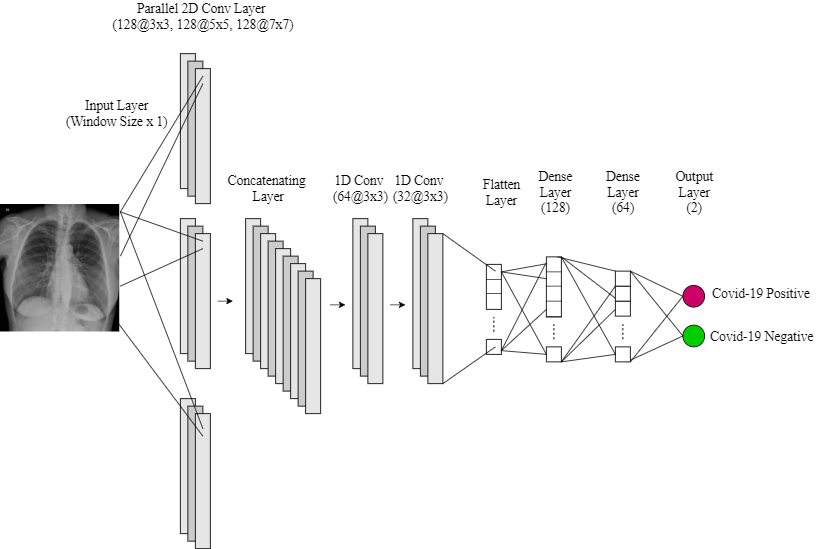

In [1]:
import numpy as np

train_dataset = np.load('./numpy/X_train.npy') 
train_labels = np.load('./numpy/y_train.npy')
valid_dataset = np.load('./numpy/X_val.npy') 
valid_labels = np.load('./numpy/y_val.npy')

In [3]:
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten,AveragePooling2D
from keras.layers import Conv2D,Activation,MaxPooling2D
from keras.utils import normalize
from keras.layers import Concatenate
from keras import Input
from keras.callbacks import ModelCheckpoint

num_channels = 3
IMG_ROW, IMG_COL = 100, 100
input_shape = (IMG_ROW, IMG_COL, num_channels)
inp=Input(shape=input_shape)
convs=[]

parrallel_kernels=[3,5]

for k in range(len(parrallel_kernels)):

    conv = Conv2D(64, parrallel_kernels[k],padding='same',activation='relu',input_shape=input_shape,strides=1)(inp)
    convs.append(conv)

out = Concatenate()(convs)
conv_model = Model(inputs=inp, outputs=out)

model = Sequential()
model.add(conv_model)

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3),name='conv_f'))
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(2,input_dim=64,activation='softmax',name='D3'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Model)              (None, 100, 100, 128)     6656      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 98, 98, 64)        73792     
_________________________________________________________________
activation_2 (Activation)    (None, 98, 98, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 47, 47, 64)        36928     
_________________________________________________________________
activation_3 (Activation)    (None, 47, 47, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)       

In [4]:
history=model.fit(train_dataset,train_labels,epochs=10,validation_data=(valid_dataset,valid_labels))

Epoch 1/10
30/30 [==============================] - 23s 781ms/step - loss: 0.4606 - accuracy: 0.7647 - val_loss: 0.3031 - val_accuracy: 0.9060
Epoch 2/10
30/30 [==============================] - 19s 638ms/step - loss: 0.1799 - accuracy: 0.9422 - val_loss: 0.1643 - val_accuracy: 0.9402
Epoch 3/10
30/30 [==============================] - 19s 635ms/step - loss: 0.1042 - accuracy: 0.9701 - val_loss: 0.1136 - val_accuracy: 0.9530
Epoch 4/10
30/30 [==============================] - 19s 635ms/step - loss: 0.0700 - accuracy: 0.9807 - val_loss: 0.1042 - val_accuracy: 0.9573
Epoch 5/10
30/30 [==============================] - 19s 635ms/step - loss: 0.0529 - accuracy: 0.9850 - val_loss: 0.0927 - val_accuracy: 0.9615
Epoch 6/10
30/30 [==============================] - 19s 638ms/step - loss: 0.0703 - accuracy: 0.9743 - val_loss: 0.1773 - val_accuracy: 0.9402
Epoch 7/10
30/30 [==============================] - 19s 632ms/step - loss: 0.0775 - accuracy: 0.9754 - val_loss: 0.1163 - val_accuracy: 0.9530

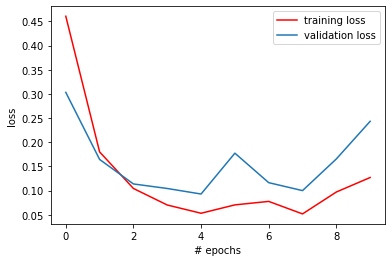

In [5]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

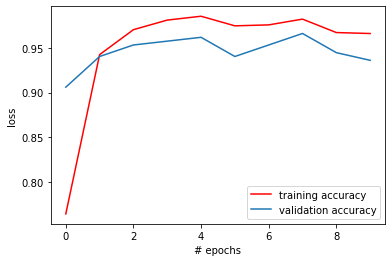

In [6]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [7]:
model.save('./grad_cam.h5')

In [8]:
from keras.models import load_model
model=load_model('./grad_cam.h5')

In [9]:
labels={0:'without_mask' , 1:'with_mask'}

In [10]:

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import PIL
import os
import numpy as np

prediction=[]
original=[]
image =[]

for i in os.listdir("./test"):
    for item in os.listdir(os.path.join("./test",i)):
        img=PIL.Image.open(os.path.join("./test",i,item))
        img=img.resize((100,100))
        image.append(img)
        img=np.asarray(img, dtype=np.float32)
        img=img/255
        img=img.reshape(-1,100,100,3)
        predict=model.predict(img)
        predict=np.argmax(predict)
        prediction.append(labels[predict])
        original.append(i)


In [11]:
score=accuracy_score(original,prediction)
print('Test Acc : {}'.format(score))

Test Acc : 0.9516908212560387


In [13]:
print(classification_report(np.asarray(prediction),np.asarray(original)))

precision    recall  f1-score   support

   with_mask       1.00      0.91      0.95       114
without_mask       0.90      1.00      0.95        93

    accuracy                           0.95       207
   macro avg       0.95      0.96      0.95       207
weighted avg       0.96      0.95      0.95       207

